# Ensembe Technique : Random Forest

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

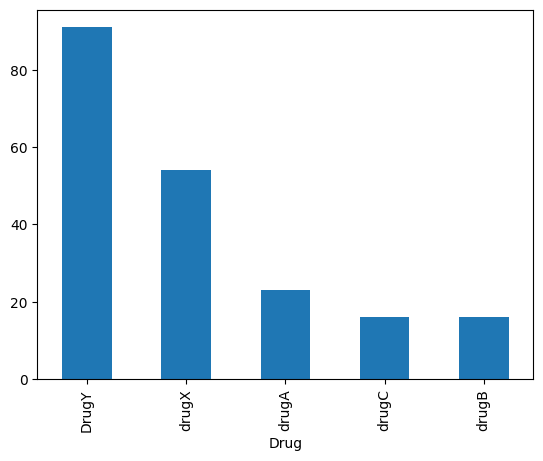

In [6]:
df['Drug'].value_counts().plot(kind='bar')

### Check missing values in the dataframe

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Seperate X and Y

In [8]:
X = df.drop(labels=['Drug'],axis=1)
Y = df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Apply Label Encoding to the Y values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y['Drug'])
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [12]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### Preprocessing on X feature

In [13]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=67)

In [23]:
xtrain.shape

(140, 9)

In [24]:
xtest.shape

(60, 9)

In [25]:
ytrain.value_counts()

Drug
0       62
4       36
1       21
2       11
3       10
Name: count, dtype: int64

In [26]:
ytest.value_counts()

Drug
0       29
4       18
3        6
2        5
1        2
Name: count, dtype: int64

### Build the model

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=21)
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=21)

In [28]:
# Training accuracy
model.score(xtrain,ytrain)

1.0

In [29]:
# Test accuracy
model.score(xtest,ytest)

0.9833333333333333

## Hyperparameter tuning

In [30]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[2,3,4,5,6,7,8],
          'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy']}

In [31]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
gscv = GridSearchCV(rfc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [32]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [33]:
gscv.best_score_

0.9957333333333335

In [35]:
best_rfc = gscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=50,
                       random_state=21)

### Evaluating the model

In [36]:
# Training Accuracy
best_rfc.score(xtrain,ytrain)

1.0

In [37]:
# Testing accuracy
best_rfc.score(xtest,ytest)

0.9833333333333333

### Predicting the values

In [38]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [39]:
ypred_tr[0:5]

array([0, 4, 1, 4, 3])

In [40]:
ytrain.head()

,Drug
122,0
72,4
76,1
112,4
196,3


In [41]:
ypred_ts[0:5]

array([4, 0, 0, 0, 1])

In [42]:
ytest.head()

,Drug
32,4
77,0
71,0
166,0
187,1


### Getting orignal labels

In [43]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [44]:
ypred_tr_lb

array(['DrugY', 'drugX', 'drugA', 'drugX', 'drugC', 'DrugY', 'drugA',
       'drugX', 'drugB', 'drugC', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'drugA', 'drugB', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'drugC', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugB', 'DrugY', 'drugX', 'drugA',
       'drugX', 'drugA', 'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugA', 'drugC', 'drugX', 'DrugY', 'drugB', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugA', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugX', 'drugA',
       'drugA', 'drugC', 'drugA', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'drugB', 'DrugY', 'drugC',
       'drugB', 'Dru

In [45]:
ypred_ts_lb

array(['drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugC',
       'drugX', 'DrugY', 'drugB', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugA', 'drugC', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugC', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugX',
       'DrugY', 'drugX', 'drugA', 'DrugY'], dtype=object)

## Confusion Matrix Testing

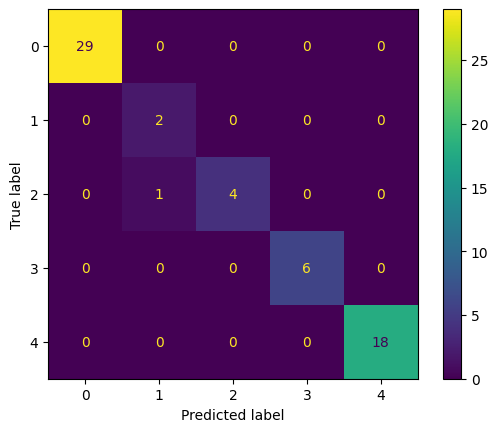

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

### Check the Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.67      1.00      0.80         2
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.99      0.98      0.98        60



### Predicting data for new patients

In [49]:
def predict_data(pre,model,le,file_path):
    # Read the dataset
    xnew = pd.read_csv(file_path)

    # Preprocessing
    xnew_pre = pre.transform(xnew)
    xnew_pre = pd.DataFrame(xnew_pre, columns=pre.get_feature_names_out())

    # Predicting
    pred = model.predict(xnew_pre)

    # Get the acutal labels
    pred_lb = le.inverse_transform(pred)

    # Storing values in dataframe
    xnew['Drug_pred']=pred_lb   

    xnew.to_csv('Predictions.csv',index=False)

    return xnew

In [50]:
file_path = 'New_patients.csv'
predict_data(pre, best_rfc, le, file_path)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred
0,25,F,NORMAL,HIGH,20.5,DrugY
1,35,M,HIGH,NORMAL,18.5,DrugY
2,57,M,LOW,HIGH,15.7,DrugY


In [51]:
xsample = df.sample(10)

In [52]:
xsample

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
186,70,M,HIGH,HIGH,9.849,drugB
35,46,M,NORMAL,NORMAL,7.285,drugX
195,56,F,LOW,HIGH,11.567,drugC
185,57,F,NORMAL,NORMAL,25.893,DrugY
77,26,F,HIGH,NORMAL,19.161,DrugY
53,24,F,HIGH,NORMAL,18.457,DrugY
173,41,F,LOW,NORMAL,18.739,DrugY
148,61,F,LOW,NORMAL,7.340,drugX
66,29,M,HIGH,HIGH,12.856,drugA
92,29,F,HIGH,HIGH,29.450,DrugY


In [53]:
xsample.to_csv('Patient2.csv',index=False)

In [54]:
file_path = 'Patient2.csv'
predict_data(pre,best_rfc,le,file_path)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_pred
0,70,M,HIGH,HIGH,9.849,drugB,drugB
1,46,M,NORMAL,NORMAL,7.285,drugX,drugX
2,56,F,LOW,HIGH,11.567,drugC,drugC
3,57,F,NORMAL,NORMAL,25.893,DrugY,DrugY
4,26,F,HIGH,NORMAL,19.161,DrugY,DrugY
5,24,F,HIGH,NORMAL,18.457,DrugY,DrugY
6,41,F,LOW,NORMAL,18.739,DrugY,DrugY
7,61,F,LOW,NORMAL,7.340,drugX,drugX
8,29,M,HIGH,HIGH,12.856,drugA,drugA
9,29,F,HIGH,HIGH,29.450,DrugY,DrugY
